# 목차
1. features importances표를 그리자
2. target에 해당하는 변수중요도를 뽑자. (99*12)
3. 각 변수당 시각화
4. 관계당 편차가 큰 변수들 설명

permutation importance를 이용하자

중요!!
- 함수화 해서 다른 데이터에도 적용이 가능하게끔 하자!!

In [2]:
!pip install eli5

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eli5

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from eli5.sklearn import PermutationImportance


In [4]:
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline

['NanumGothic']


In [5]:
data = pd.read_csv('../national_only20_health_2010to2021.csv')
data.head()

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,b'A313080202',b'A3130802',2010.0,1.0,1.0,1.0,29.0,3.0,3.0,3.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,b'H310920902',b'H3109209',2010.0,8.0,2.0,2.0,29.0,1.0,2.0,1.0,...,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b'A349972303',b'A3499723',2011.0,1.0,1.0,2.0,25.0,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,b'A349975303',b'A3499753',2011.0,1.0,1.0,2.0,21.0,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,b'A350968102',b'A3509681',2011.0,1.0,1.0,2.0,28.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0


In [6]:
target = ['비만', '고혈압', '당뇨병', '고콜레스테롤혈증', '고중성지방혈증', 'B형간염', '빈혈', '뇌졸중', '협심증또는심근경색증', '천식', '아토피피부염', '골관절염', '우울증']

## feature_importances를 사용할 수 있는 변수와 그렇지 못한 변수 선택

- 해당 변수의 고유값이 너무 많을땐, 중요도를 구하는게 의미가 없음
- 따라서 밑의 코드를 활용해서, 고유값이 너무 많은 변수들은 제외시킨다. 

In [7]:
over_num_features = []
useful_num_features = []

for ii in data.columns:
    #print('변수명 : ', ii)
    #print('각 변수당 고유값의 개수 :', len(set(data[ii])))
    if len(set(data[ii])) > 50 :
        over_num_features.append(ii)
    else :
        useful_num_features.append(ii)
        print('변수명 : ', ii)
        print('각 변수당 고유값의 개수 :', len(set(data[ii])))

변수명 :  year
각 변수당 고유값의 개수 : 12
변수명 :  region
각 변수당 고유값의 개수 : 17
변수명 :  town_t
각 변수당 고유값의 개수 : 2
변수명 :  sex
각 변수당 고유값의 개수 : 2
변수명 :  age
각 변수당 고유값의 개수 : 10
변수명 :  incm
각 변수당 고유값의 개수 : 4
변수명 :  ho_incm
각 변수당 고유값의 개수 : 4
변수명 :  incm5
각 변수당 고유값의 개수 : 5
변수명 :  ho_incm5
각 변수당 고유값의 개수 : 5
변수명 :  edu
각 변수당 고유값의 개수 : 4
변수명 :  occp
각 변수당 고유값의 개수 : 7
변수명 :  cfam
각 변수당 고유값의 개수 : 6
변수명 :  genertn
각 변수당 고유값의 개수 : 7
변수명 :  allownc
각 변수당 고유값의 개수 : 3
변수명 :  marri_1
각 변수당 고유값의 개수 : 2
변수명 :  marri_2
각 변수당 고유값의 개수 : 6
변수명 :  fam_rela
각 변수당 고유값의 개수 : 9
변수명 :  tins
각 변수당 고유값의 개수 : 4
변수명 :  D_1_1
각 변수당 고유값의 개수 : 5
변수명 :  educ
각 변수당 고유값의 개수 : 7
변수명 :  EC1_1
각 변수당 고유값의 개수 : 2
변수명 :  EC_wht_5
각 변수당 고유값의 개수 : 10
변수명 :  EC_pedu_1
각 변수당 고유값의 개수 : 8
변수명 :  EC_pedu_2
각 변수당 고유값의 개수 : 8
변수명 :  BD1_11
각 변수당 고유값의 개수 : 7
변수명 :  BD2_1
각 변수당 고유값의 개수 : 6
변수명 :  BD2_31
각 변수당 고유값의 개수 : 6
변수명 :  dr_month
각 변수당 고유값의 개수 : 2
변수명 :  BP6_10
각 변수당 고유값의 개수 : 3
변수명 :  BP7
각 변수당 고유값의 개수 : 3
변수명 :  mh_stress
각 변수당 고유값의 개수 : 2
변수명 :  BS3

In [8]:
print(len(over_num_features), over_num_features)

40 ['ID', 'ID_fam', 'EC_wht_23', 'HE_sbp', 'HE_dbp', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2', 'HE_TG', 'HE_ast', 'HE_alt', 'HE_HB', 'HE_HCT', 'HE_crea', 'HE_WBC', 'HE_RBC', 'HE_Bplt', 'HE_Ucrea', 'N_INTK', 'N_EN', 'N_WATER', 'N_PROT', 'N_FAT', 'N_CHO', 'N_CA', 'N_PHOS', 'N_FE', 'N_NA', 'N_K', 'N_CAROT', 'N_RETIN', 'N_B1', 'N_B2', 'N_NIAC', 'N_VITC']


In [9]:
print(len(useful_num_features), useful_num_features)

82 ['year', 'region', 'town_t', 'sex', 'age', 'incm', 'ho_incm', 'incm5', 'ho_incm5', 'edu', 'occp', 'cfam', 'genertn', 'allownc', 'marri_1', 'marri_2', 'fam_rela', 'tins', 'D_1_1', 'educ', 'EC1_1', 'EC_wht_5', 'EC_pedu_1', 'EC_pedu_2', 'BD1_11', 'BD2_1', 'BD2_31', 'dr_month', 'BP6_10', 'BP7', 'mh_stress', 'BS3_1', 'BE3_31', 'BE5_1', 'LW_mt', 'LW_mt_a1', 'LW_br', 'HE_fst', 'HE_HPdr', 'HE_DMdr', 'HE_mens', 'HE_prg', 'HE_HPfh1', 'HE_HPfh2', 'HE_HPfh3', 'HE_HLfh1', 'HE_HLfh2', 'HE_HLfh3', 'HE_IHDfh1', 'HE_IHDfh2', 'HE_IHDfh3', 'HE_STRfh1', 'HE_STRfh2', 'HE_STRfh3', 'HE_DMfh1', 'HE_DMfh2', 'HE_DMfh3', 'HE_rPLS', 'HE_hepaB', 'HE_BUN', 'HE_Uph', 'HE_Unitr', 'HE_Usg', 'HE_Upro', 'HE_Uglu', 'HE_Uket', 'HE_Ubil', 'HE_Ubld', 'HE_Uro', '비만', '고혈압', '당뇨병', '고콜레스테롤혈증', '고중성지방혈증', 'B형간염', '빈혈', '뇌졸중', '협심증또는심근경색증', '천식', '아토피피부염', '골관절염', '우울증']


In [10]:
data['HE_Usg']

0       1.026
1       1.024
2       1.026
3       1.036
4       1.026
        ...  
3796    1.028
3797    1.035
3798    1.024
3799    1.020
3800    1.026
Name: HE_Usg, Length: 3801, dtype: float64

## target끼리의 heatmap을 그려보자

- target끼리 독립적이지 못하면, 변수 추출에도 고민을 해야한다. 
- 결과가 굉장히 몇몇 질병들끼리 상관계수가 높다.

In [11]:
train = data[target]

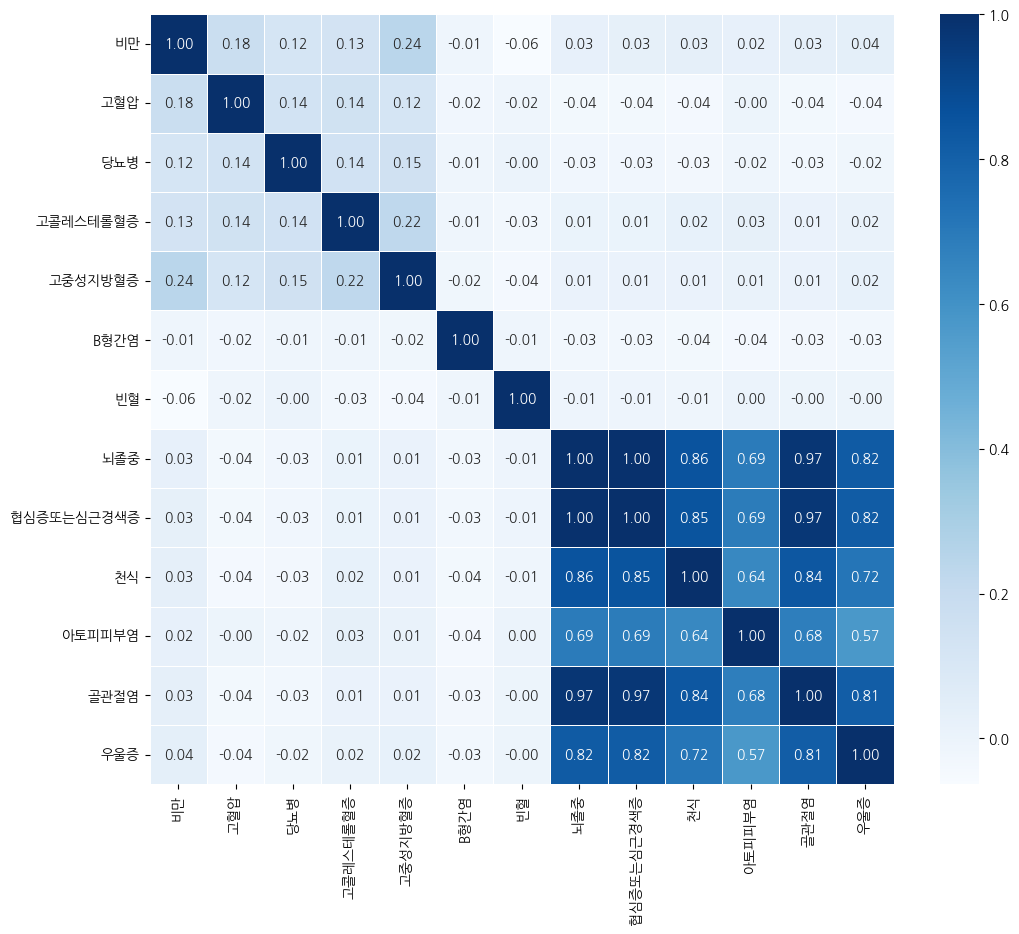

In [12]:
plt.figure(figsize=(12,10))
_=sns.heatmap(data = train.corr(method = 'pearson'), annot = True, fmt = '.2f',linewidths = .5, cmap = 'Blues')

target끼리 영향을 미치는 요인이 있다. 

## Randomforest classifier

- 새로 randomforest로 분류하고, feature importances를 구해서, 변수들을 추출하고 시각화하자.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from eli5.sklearn import PermutationImportance

In [14]:
features = useful_num_features[:-13]
target

['비만',
 '고혈압',
 '당뇨병',
 '고콜레스테롤혈증',
 '고중성지방혈증',
 'B형간염',
 '빈혈',
 '뇌졸중',
 '협심증또는심근경색증',
 '천식',
 '아토피피부염',
 '골관절염',
 '우울증']

In [15]:
import collections 

collections.Counter(data['비만'].values)

Counter({1.0: 999, 0.0: 2802})

In [16]:
for ii in target:
    print('{} 질병은 {}이렇게 있다.'.format(ii, data[ii].unique()))
    print(collections.Counter(data[ii].values))
    print('\n')

비만 질병은 [1. 0.]이렇게 있다.
Counter({0.0: 2802, 1.0: 999})


고혈압 질병은 [1. 0.]이렇게 있다.
Counter({0.0: 3643, 1.0: 158})


당뇨병 질병은 [1. 0.]이렇게 있다.
Counter({0.0: 3758, 1.0: 43})


고콜레스테롤혈증 질병은 [0. 1.]이렇게 있다.
Counter({0.0: 3647, 1.0: 154})


고중성지방혈증 질병은 [1. 0.]이렇게 있다.
Counter({0.0: 3567, 1.0: 234})


B형간염 질병은 [0. 1.]이렇게 있다.
Counter({0.0: 3756, 1.0: 45})


빈혈 질병은 [0. 1.]이렇게 있다.
Counter({0.0: 3620, 1.0: 181})


뇌졸중 질병은 [-1.  0.]이렇게 있다.
Counter({0.0: 3164, -1.0: 637})


협심증또는심근경색증 질병은 [-1.  1.  0.]이렇게 있다.
Counter({0.0: 3163, -1.0: 636, 1.0: 2})


천식 질병은 [-1.  1.  0.]이렇게 있다.
Counter({0.0: 3039, -1.0: 620, 1.0: 142})


아토피피부염 질병은 [-1.  0.  1.]이렇게 있다.
Counter({0.0: 2823, -1.0: 574, 1.0: 404})


골관절염 질병은 [-1.  1.  0.]이렇게 있다.
Counter({0.0: 3150, -1.0: 633, 1.0: 18})


우울증 질병은 [-1.  0.  1.]이렇게 있다.
Counter({0.0: 3072, -1.0: 584, 1.0: 145})




In [17]:
df = pd.DataFrame(model.feature_importances_, index = features)
df.sort_values(0, ascending=False)

NameError: name 'model' is not defined

In [69]:
def rf_fe_importance(target_name, num):
    '''
    랜덤포레스트로 변수중요도 구하기
        target_name : 변수이름
        num : 상위n개 변수 뽑기
    '''

    X = data[features]
    y = data[target_name]

    X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,test_size=0.1, random_state=42)

    model = RandomForestClassifier(n_estimators=5, random_state=0)
    model.fit(X_train, y_train)

    predict = model.predict(X_test)
    df = pd.DataFrame(model.feature_importances_, index = features)[:num].sort_values(0, ascending=False)
    return df

In [70]:
## dic_fe_impo봐보기

dic_fe_impo = {}

for ii in target :
    dic_fe_impo[ii] = rf_fe_importance(ii)

In [75]:
##모든 값들의 feature_importances값들은 다 똑같다. 
for ii in range(len(target)):
    if list(dic_fe_impo['비만'].index)  != list(dic_fe_impo[target[ii]].index) :
        print('비만 칼럼명과 {}칼럼명이 다르다'.format(target[ii]))
    else :
        print('비만 칼럼명과 {}칼럼명이 같다'.format(target[ii]))

비만 칼럼명과 비만칼럼명이 같다
비만 칼럼명과 고혈압칼럼명이 다르다
비만 칼럼명과 당뇨병칼럼명이 다르다
비만 칼럼명과 고콜레스테롤혈증칼럼명이 다르다
비만 칼럼명과 고중성지방혈증칼럼명이 다르다
비만 칼럼명과 B형간염칼럼명이 다르다
비만 칼럼명과 빈혈칼럼명이 다르다
비만 칼럼명과 뇌졸중칼럼명이 다르다
비만 칼럼명과 협심증또는심근경색증칼럼명이 다르다
비만 칼럼명과 천식칼럼명이 다르다
비만 칼럼명과 아토피피부염칼럼명이 다르다
비만 칼럼명과 골관절염칼럼명이 다르다
비만 칼럼명과 우울증칼럼명이 다르다


## 시각화

In [76]:
def visualization(target_name):   
    plt.figure(figsize=(30, 30))
    dic_fe_impo[target_name].plot(kind='bar')
    _=plt.xticks(rotation=90)
    _=plt.legend([])
    

In [79]:
target

['비만',
 '고혈압',
 '당뇨병',
 '고콜레스테롤혈증',
 '고중성지방혈증',
 'B형간염',
 '빈혈',
 '뇌졸중',
 '협심증또는심근경색증',
 '천식',
 '아토피피부염',
 '골관절염',
 '우울증']

C:\Users\jihoo\AppData\Local\Temp\ipykernel_26732\90951101.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30, 30))


<Figure size 3000x3000 with 0 Axes>

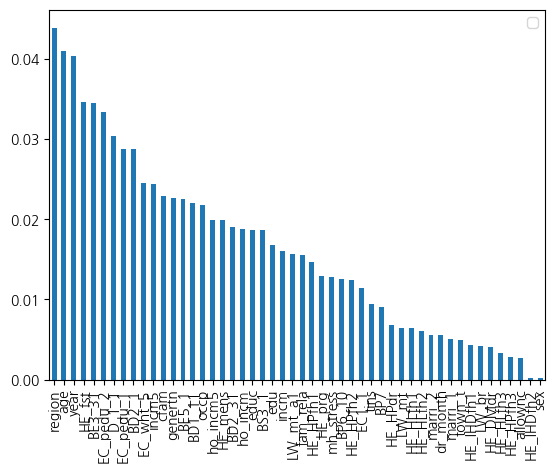

<Figure size 3000x3000 with 0 Axes>

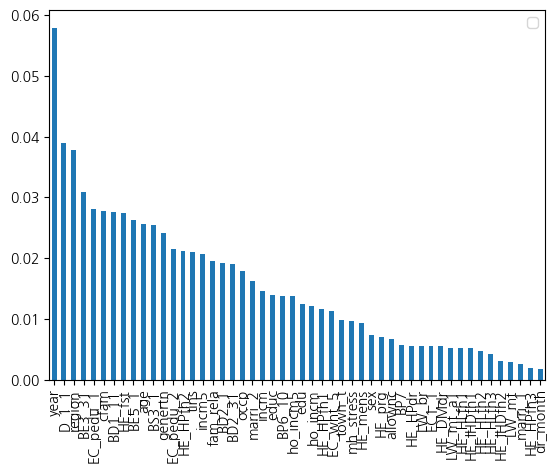

<Figure size 3000x3000 with 0 Axes>

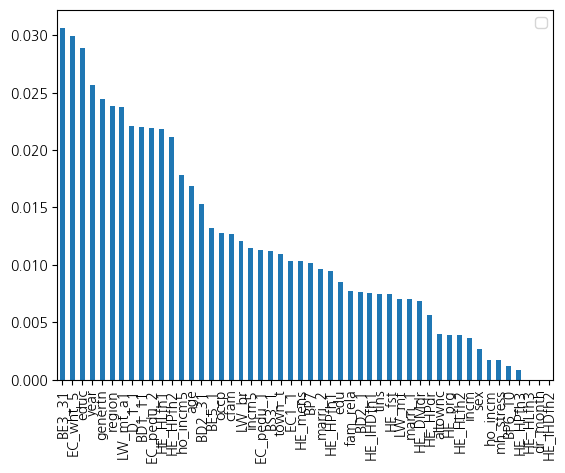

<Figure size 3000x3000 with 0 Axes>

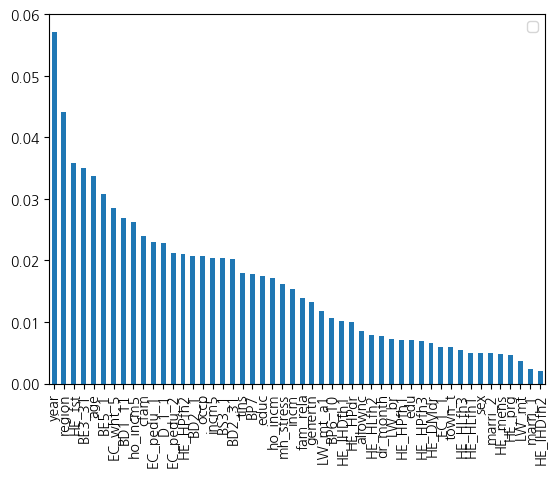

<Figure size 3000x3000 with 0 Axes>

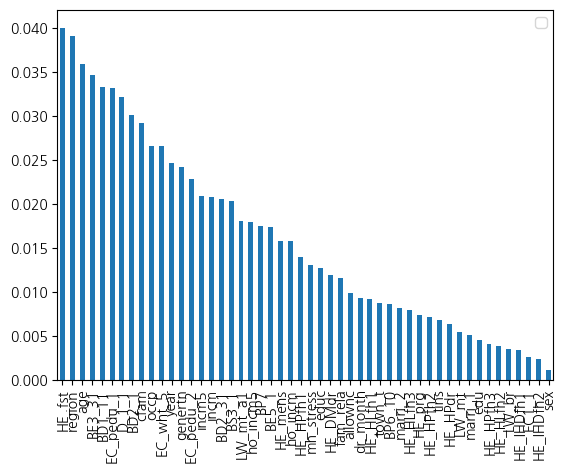

<Figure size 3000x3000 with 0 Axes>

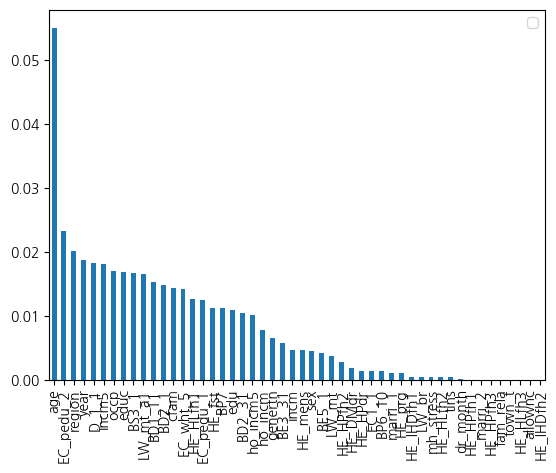

<Figure size 3000x3000 with 0 Axes>

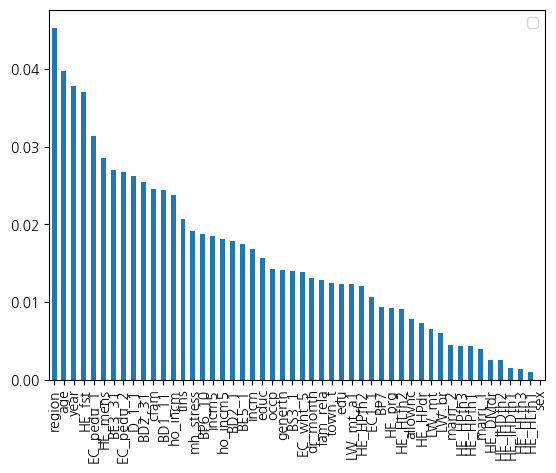

<Figure size 3000x3000 with 0 Axes>

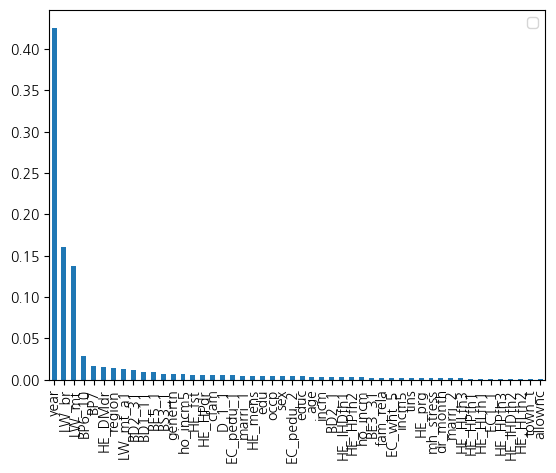

<Figure size 3000x3000 with 0 Axes>

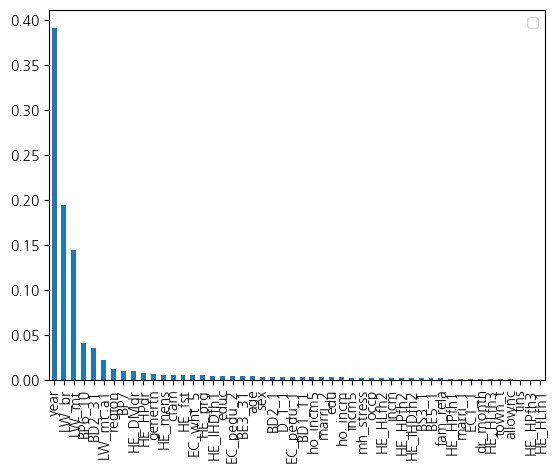

<Figure size 3000x3000 with 0 Axes>

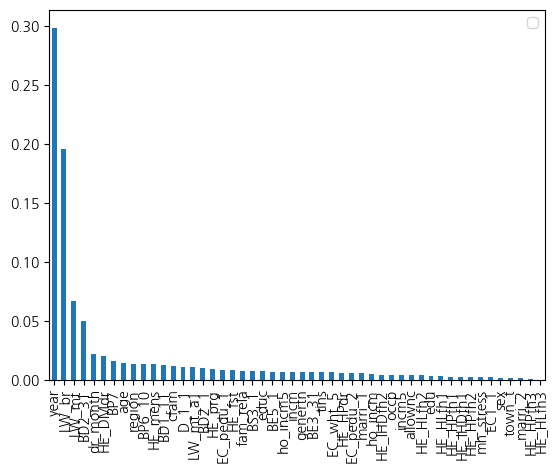

<Figure size 3000x3000 with 0 Axes>

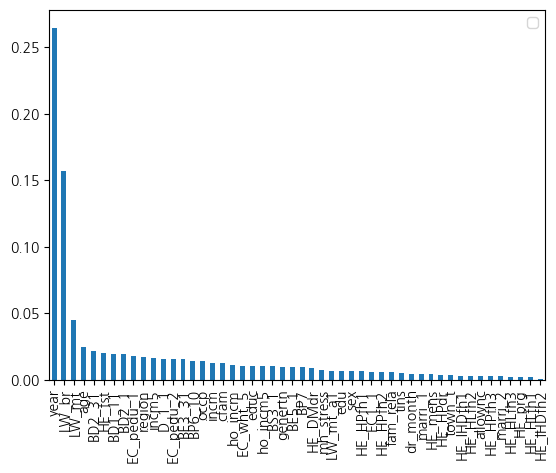

<Figure size 3000x3000 with 0 Axes>

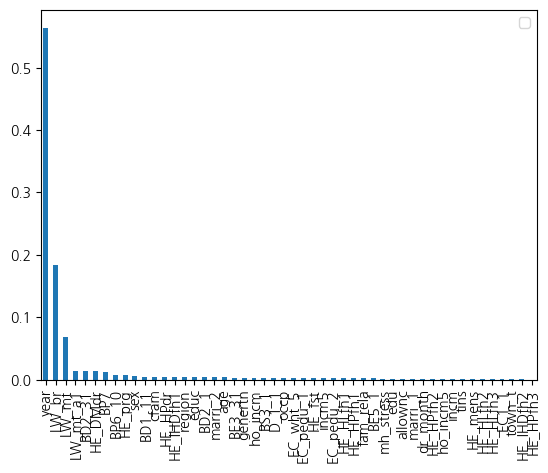

<Figure size 3000x3000 with 0 Axes>

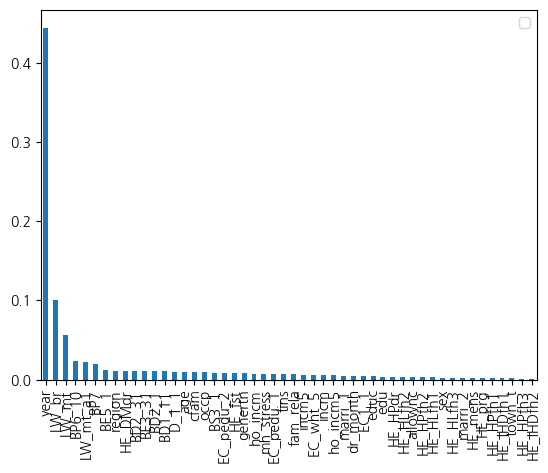

In [78]:
for ii in target :
    visualization(ii)

50